# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
# load data, import libraries
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import scipy.stats

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [3]:
np.random.seed(1999)

In [4]:
# check the heading of the data frame
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Question 1: Is the distribution of body temperatures normal?

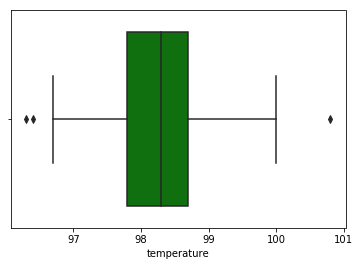

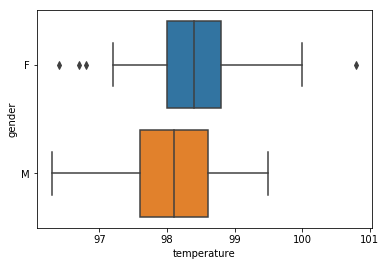

In [5]:
# check the box plot of the distribution
sns.boxplot(df.temperature,color='green')
plt.show()
sns.boxplot(df.temperature, df.gender)
plt.show()

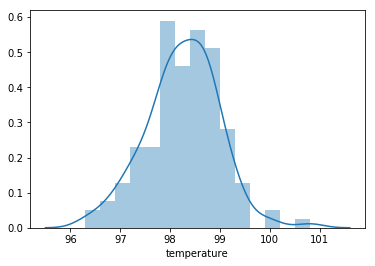

In [6]:
# histogram of the temperature
sns.distplot(df.temperature.dropna(),bins=15)
plt.show()

In [7]:
# Normality test, hypothesis: normal distribution
scipy.stats.normaltest(df.temperature, axis=0, nan_policy='propagate')

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [8]:
# Skewness
scipy.stats.skew(df.temperature, axis=0, bias=True, nan_policy='propagate')

-0.004367976879081625

In [9]:
# Normality test, hypothesis: skewness = 0
scipy.stats.skewtest(df.temperature, axis=0, nan_policy='propagate')

SkewtestResult(statistic=-0.021370491432770995, pvalue=0.98295011261353815)

In [10]:
# Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
scipy.stats.shapiro(df.temperature, a=None, reta=False)

(0.9865770936012268, 0.233174666762352)

In [11]:
# Anderson Darling test
scipy.stats.anderson(df.temperature, dist='norm')

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Question 1 Conclusion:  Boxplot and histogram suggest that temperature is approximately normally distributed. The normality tests also suggest that the sample is normally distributed, but slightly left skew.

# Question 2 : sample size, if each observation is independent?

In [12]:
np.count_nonzero(df.temperature)
#scipy.stats.chi2_contingency(df.temperature, correction=True, lambda_=None)

130

#? How to test if each observation is independent? 

Question 2 Conclusion: Sample size is large enough (>30)

# Question 3: Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

Here, to test mean = 98.6, it is appropriate to use one-sample test with t statistics.
Hypothesis: mean = 98.6 
Alternative hypothesis: mean not equals to 98.6
Becasue we are comparing one sample mean to a number, but not comparing two sample means. Therefore, one-sample test is appropriate. Since population mean and standard deviation are unknown, we should use t test here. 

In [13]:
# mean and standard deviation of the sample
mu, std = df.temperature.mean(),df.temperature.std()
mu, std

(98.24923076923078, 0.7331831580389454)

In [14]:
# one sample t-test
scipy.stats.ttest_1samp(df.temperature, 98.6, nan_policy='propagate')

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [15]:
# one sample z-statistics 
import math
zscore = (98.6 - mu)/(std/(math.sqrt(len(df.temperature))))
p_values = scipy.stats.norm.sf(abs(zscore))*2
zscore, p_values

(5.454823292364079, 4.9021570141133797e-08)

Question 3 Conclusion: One sample t-test has p-value of 2.41e-07 < .05, therefore, reject the null hypothesis that population mean is 98.6. 
Z-statistic suggest the same result that reject null hypothesis. So the population mean is significantly different from 98.6

# Question 4 : At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [16]:
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = plt.gca()
    plt.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

The following is interactive plot of sample distribution

In [17]:
# resampling: 
# use the sample itself as a model of the population distribution and draw samples from it.
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [5, 95])
    
        plt.hist(sample_stats)
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        plt.show()


In [18]:
pop_temp = scipy.stats.norm(mu, std)

In [19]:
def interact_func(n, xlim):
    sample = pop_temp.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

In [20]:
# The sample mean with confidence interval and standard error.
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func, n=slider, xlim=fixed([97.8, 98.7]))
None

Question 4 conclusion: When supposing n=1000, the margin error is .035, and the confidence interval within 2 standard deviation around mean is [98.24, 98.31]. Any temperature outside the range would be consider abnormal. 

In [21]:
# compute standard deviation of resampled data
class StdResampler(Resampler):   
    """Computes the sampling distribution of the standard deviation."""
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.std()

def interact_func2(n, xlim):
    sample = pop_temp.rvs(n)
    resampler = StdResampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()


In [22]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func2, n=slider, xlim=fixed([0.4, 1]))
None

# Question 5 : Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

To test mean difference between two samples, it is appropriate to use two sample t-test. 

In [23]:
mean = df.groupby('gender').temperature.mean()
std = df.groupby('gender').temperature.std()
female_mu = mean['F']
female_std = std['F']
male_mu = mean['M']
male_std = std['M']
female_mu, male_mu,female_std, male_std

(98.393846153846127,
 98.1046153846154,
 0.74348775273136747,
 0.69875576232659764)

In [24]:
female_mu - male_mu

0.28923076923072699

In [25]:
male_sample = scipy.stats.norm(male_mu, male_std).rvs(100)
female_sample = scipy.stats.norm(female_mu, female_std).rvs(100)
female_sample.mean()-male_sample.mean()

0.34206177087345679

In [26]:
scipy.stats.ttest_ind(male_sample, female_sample, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-3.2590174947980719, pvalue=0.0013158654872794057)

Here, given p-value < .05, the two-sample t-test suggest that two samples mean is significantly different. So we can reject the null hypothesis that two sample have same mean.

In [27]:
# structure of hypothesis test 
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = plt.hist(ht.test_stats, color = 'grey' )
        plt.vlines(self.actual, 0, max(ys), linewidth=3, color='red')
        plt.xlabel('test statistic')
        plt.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()


In [28]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [29]:
data = (male_sample, female_sample)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans male female temperature')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means male female temperature
p-value = 0.003
actual = 0.342061770873
ts max = 0.362046040588


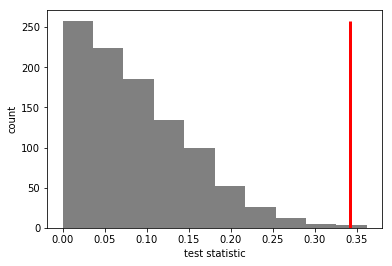

In [30]:
ht.PlotHist()
plt.show()

From the hypothesis test, given p-value = .003 < .05. There is sufficient evidence to reject null hypothesis that two group has same mean.
From the plot, we can see that the test statistics under null hypothesis. Therefore, it is highly unlikely that null hypothesis is true. 

In [31]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [32]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2, xlim=None):
        self.group1 = group1
        self.group2 = group2
        self.xlim = xlim
        
    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = np.random.choice(self.group1, n, replace=True)
        group2 = np.random.choice(self.group2, m, replace=True)
        return group1, group2
    
    def sample_stat(self, groups):
        group1, group2 = groups
        return CohenEffectSize(group1, group2)

In [33]:
Cohen_d = CohenEffectSize(female_sample, male_sample)
Cohen_d

0.4632165763376106

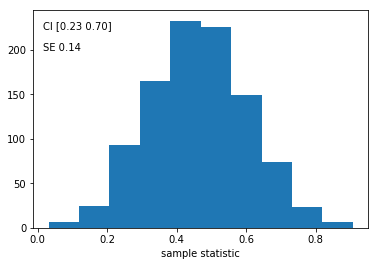

In [34]:
# plot the distribution of Cohen_d
resampler = CohenResampler(female_sample, male_sample)
resampler.plot_sampling_distribution()

In [35]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2, xlim=None):
        self.group1 = group1
        self.group2 = group2
        self.xlim = xlim
    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = np.random.choice(self.group1, n, replace=True)
        group2 = np.random.choice(self.group2, m, replace=True)
        return group1, group2
    def sample_stat(self, groups):
        group1, group2 = groups
        return group1.mean()-group2.mean()

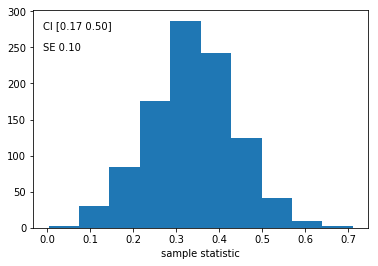

In [36]:
# plot the distribution of mean difference
resampler = CohenResampler(female_sample, male_sample)
resampler.plot_sampling_distribution()

From the mean difference distribution plot, we can see that mean difference is away from 0. 90% confidence interval for group mean difference is [.17,.5]

In [37]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority

def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = scipy.stats.norm(0, 1)
    treatment = scipy.stats.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color='green', alpha=0.7)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color='yellow', alpha=0.7)
    
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    #print('overlap', o)
    #print('superiority', s)


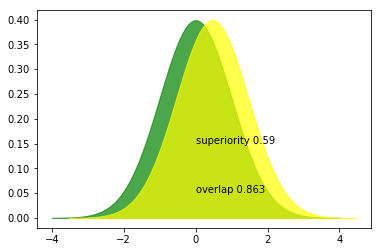

In [38]:
# plot of Cohen_d 
plot_pdfs(Cohen_d)

In [39]:
slider = widgets.FloatSlider(min=0, max=1, value=2)
interact(plot_pdfs, cohen_d=slider)
None


Question 5 Conclusion: There is significant difference between male and female temperature. 